In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Import the data from the CSV file created from MongoDB
file_name = "survey_data.csv"
df = pd.read_csv(file_name)

# Display the first few rows
df.head()

age  gender  income  utilities  entertainment  school_fees  shopping  \
0   28  Female  3000.0      400.0          100.0        300.0     250.0   
1   43  Female  4000.0     1500.0          700.0        200.0     600.0   
2   21    Male   800.0      200.0           50.0        250.0     100.0   
3   46    Male  5000.0     1000.0          500.0        450.0     550.0   
4   24  Female  1500.0      400.0          250.0        250.0     100.0   

   healthcare  
0       300.0  
1       450.0  
2       150.0  
3       300.0  
4       100.0

In [27]:
# Arrange the dataset by income in descending order to highlight the highest earners
highest_income_df = df.sort_values(by="income", ascending=False)

# Extract and display the five highest income records, focusing on age and income columns
highest_income_df[['age', 'income']].head(5)

# Generate a visualization to represent the highest income earners
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='income', data=highest_income_df.head(5), hue='age', palette="deep")  
plt.title("Top 5 Age Groups with the Highest Income", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Total Income", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ages_with_highest_income.png')  # Export the charts for use in a PowerPoint presentation
plt.show()


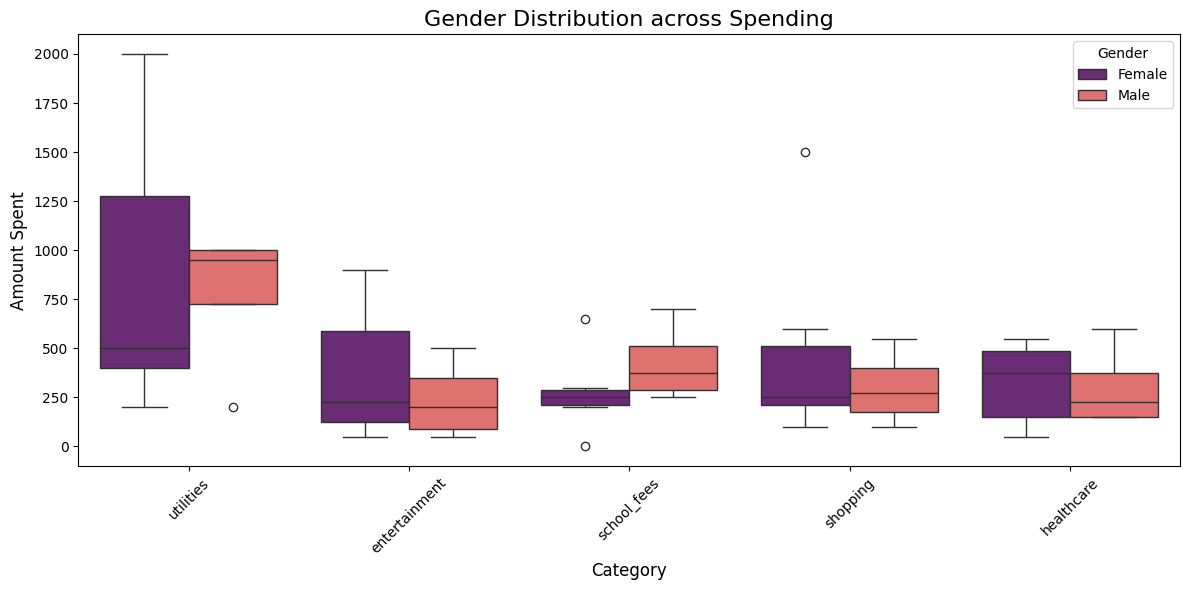

In [30]:
# Data Preparation for gender distribution across spending
categories = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
spending_data = df.melt(id_vars=['gender'], value_vars=categories, var_name='Category', value_name='Spending')

plt.figure(figsize=(12, 6))
sns.boxplot(data=spending_data, x='Category', y='Spending', hue='gender', palette='magma')
plt.title('Gender Distribution across Spending', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('gender_distribution_across_spending_categories.png')  # Export the charts for use in a PowerPoint presentation
plt.show()

        utilities  entertainment  school_fees  shopping  healthcare
gender                                                             
Female     5100.0         2200.0       1650.0    2900.0      1950.0
Male       3100.0          950.0       1700.0    1200.0      1200.0


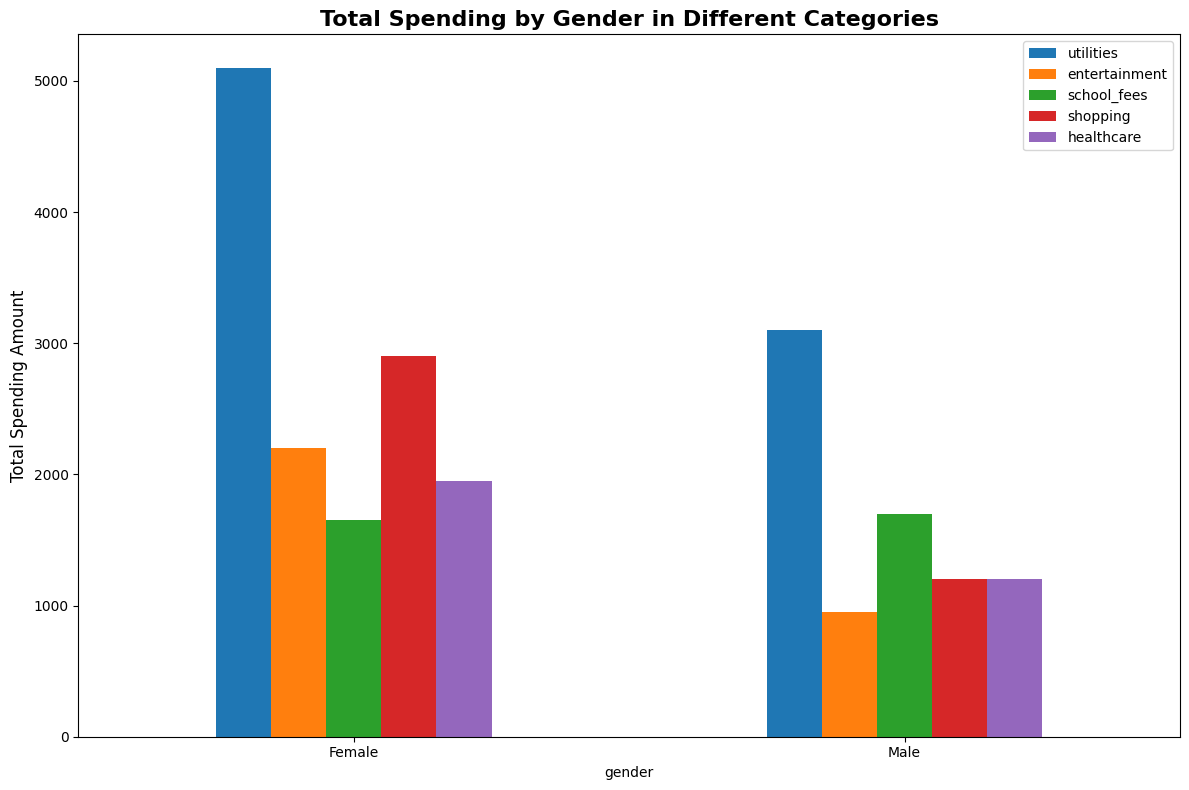

In [32]:
# Group the data by gender and calculate the total spending for each category
gender_spending = df.groupby("gender")[['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']].sum()

# Output the summarized gender spending data
print(gender_spending)

# Create a bar plot to show the total spending for each gender across the categories
gender_spending.plot(kind='bar', figsize=(12, 8))  
plt.title("Total Spending by Gender in Different Categories", fontsize=16, fontweight='bold')
plt.ylabel("Total Spending Amount", fontsize=12)
plt.xticks(rotation=0)  
plt.tight_layout()
plt.savefig('gender_distribution_spending_chart.png')  # Export the charts for use in a PowerPoint presentation
plt.show()
